In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
cleveland = pd.read_csv('heart.csv')
cleveland.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = data.dropna(axis=0)
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = data.dropna(axis=0)
data.loc[0:]

print(data.shape)
print(data.dtypes)

data.describe()

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


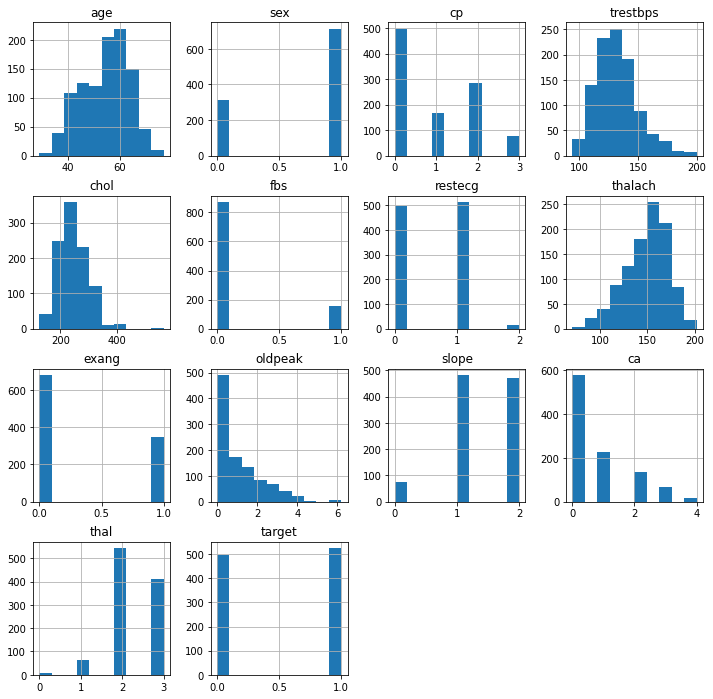

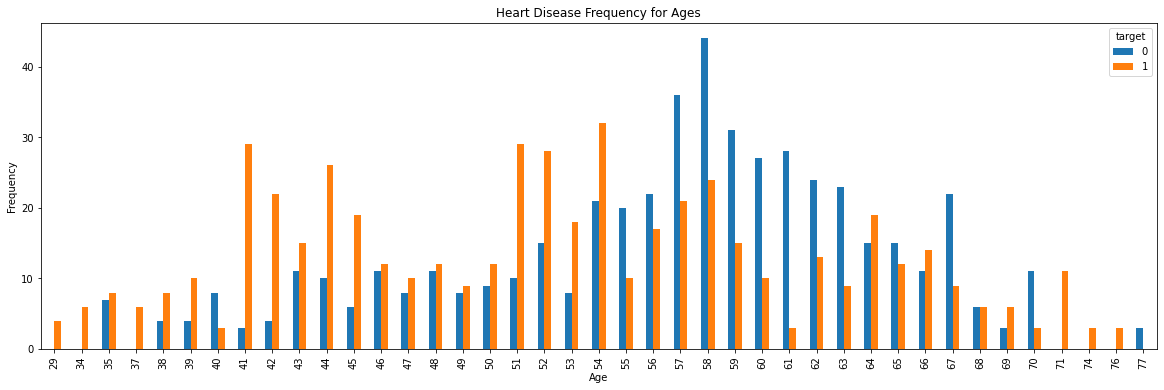

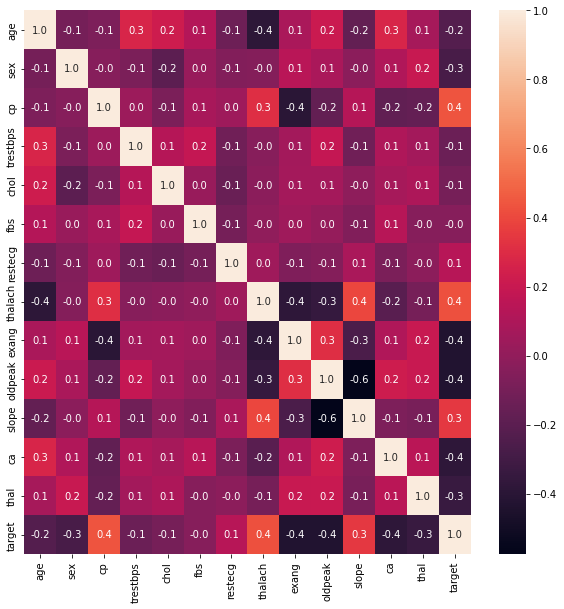

In [ ]:
data.hist(figsize = (12,12))
plt.show()
pd.crosstab(data.age,data.target).plot(kind = "bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
X = np.array(data.drop(['target'],1))
y = np.array(data['target'])
mean = X.mean(axis=0)
X-=mean
std = X.std(axis=0)
X/=std

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,stratify=y,random_state=42,test_size = 0.2)
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train,num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])
X_train[0]

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


<ipython-input-6-bc2ea3d14f0d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'],1))


array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
def create_model():
  model = Sequential()
  model.add(Dense(16,input_dim=13,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.001),activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2 (0.001), activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense (2, activation='softmax'))
  adam = Adam (learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model
model = create_model()
print (model.summary())
history=model.fit (X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)
history=model.fit (X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
82/82 [==============================] - 1

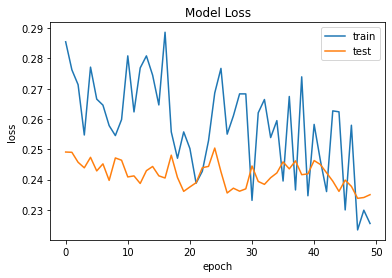

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

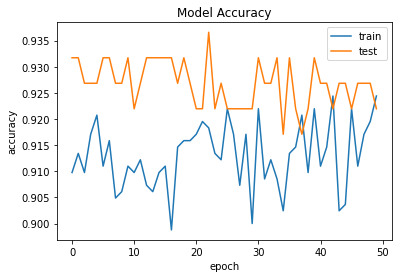

In [ ]:
import matplotlib.pyplot as plot
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test. copy()
Y_train_binary [Y_train_binary > 0] = 1
Y_test_binary [Y_test_binary > 0] = 1
print (Y_train_binary[:20])

def create_binary_model():

   model = Sequential()
   model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
   model.add(Dropout(0.25))
   model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
   model.add(Dropout(0.25))
   model.add(Dense(1, activation='sigmoid'))

   adam = Adam (learning_rate=0.001)
   model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
   return model
binary_model = create_binary_model()
print (binary_model.summary())

history=binary_model.fit (X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5

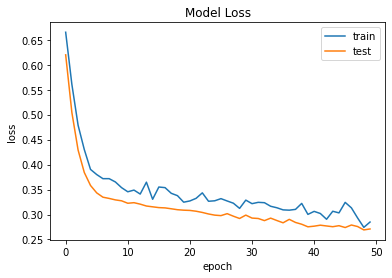

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

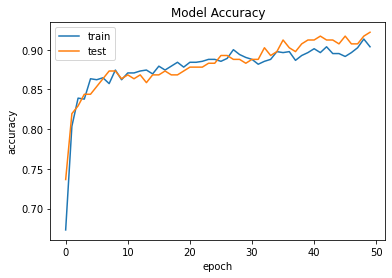

In [ ]:
import matplotlib.pyplot as plot
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
import random
best=-100000
populations = [[1,0,0,0,1],[1,1,1,0,1],[0,1,0,0,0],[1,0,0,1,1]]
parents=[]
new_populations = []
print(populations)

[[1, 0, 0, 0, 1], [1, 1, 1, 0, 1], [0, 1, 0, 0, 0], [1, 0, 0, 1, 1]]


In [ ]:
def fitness_score() :
    global populations,best
    fit_value = []
    fit_score = []
    for i in range(4) :
      chromosome_value = 0
      for j in range(4,0,-1) :
        chromosome_value += populations[i][j]*(2**(4-j))
      chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
      print(chromosome_value)
      fit_value.append(-(chromosome_value**2) + 5)
    print(fit_value)
    fit_value, populations = zip(*sorted(zip(fit_value,populations),reverse = True))
    best = fit_value[0]
fitness_score()

-1
-13
8
-3
[4, -164, -59, -4]


In [ ]:
def selectparent():
    global parents
    parents=populations[0:2]
    print(type(parents))
    print(parents)
selectparent()


<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [ ]:
def crossover():
    global parents
    cross_point = random.randint(0,5)
    parents = parents + tuple([(parents[0][0:cross_point + 1]+parents[1][cross_point +1:6])])
    parents = parents + tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:6])])
    print(parents)
crossover()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1])


In [ ]:
def mutation():
    global populations,parents
    mute = random.randint(0,49)
    if mute==20:
      x = random.randint(0,3)
      y = random.randint(0,4)
      parents[x][y]= 1-parents[x][y]
    populations = parents
    print(populations)
mutation()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1])


In [ ]:
for i in range(1000):
  fitness_score()
  selectparent()
  crossover()
  mutation()
print("best score: ")
print(best)
print("sequence:.......")
print(populations[0])

Streaming output truncated to the last 5000 lines.
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

categorical_pred = np.argmax(model.predict(X_test),axis=1)

print('Results for Categorical Model i.e Just ANN model')
print(accuracy_score(y_test,categorical_pred))
print(classification_report(y_test,categorical_pred))

7/7 [==============================] - 0s 2ms/step
Results for Categorical Model i.e Just ANN model
0.9219512195121952
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.92      0.93      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
from sklearn.metrics import classification_report,accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model i.e Optimized ANN with Genetic Algorithm')
print(accuracy_score(Y_test_binary,binary_pred))
print(classification_report(Y_test_binary,binary_pred))

7/7 [==============================] - 0s 1ms/step
Results for Binary Model i.e Optimized ANN with Genetic Algorithm
0.9219512195121952
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       100
           1       0.91      0.94      0.93       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

